**Bitcoin Price Prediction and Analysis Using Deep Learning Models**

S.NARTHANA - 21MIA1124



            Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2708  2022-02-15  42586.464844  44667.218750  42491.035156  44575.203125   
2709  2022-02-16  44578.277344  44578.277344  43456.691406  43961.859375   
2710  2022-02-17  43937.070313  44132.972656  40249.371094  40538.011719   
2711  2022-02-18  40552.132813  40929.152344  39637.617188  40030.976563   
2712  2022-02-19  40022.132813  40246.027344  40010.867188  40126.429688   

         Adj Close       Volume  
0       457.334015     21056800  
1       424.440002 

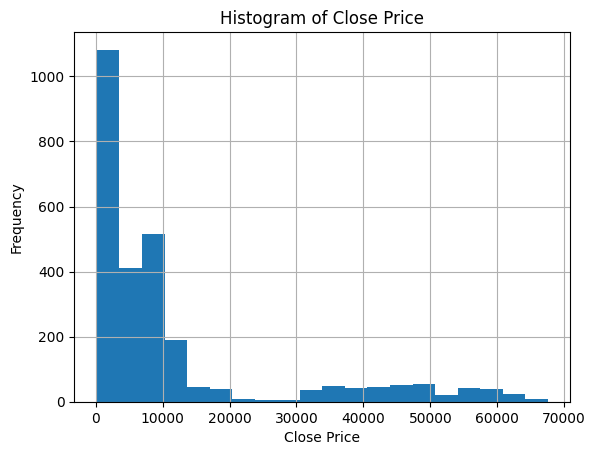

count     2713.000000
mean     11323.914637
std      16110.365010
min        178.102997
25%        606.718994
50%       6317.609863
75%      10462.259766
max      67566.828125
Name: Close, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/BTC-USD.csv')

# Display the DataFrame
print(df)

# Display the histogram
df['Close'].hist(bins=20)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Close Price')
plt.show()

# Display the descriptive statistics
statistics = df['Close'].describe()
print(statistics)


In [ ]:
# Check for null values
null_counts = df.isnull().sum()

# Display the null value counts
print(null_counts)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**LSTM MODEL**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Load the dataset
data = pd.read_csv('/content/BTC-USD.csv')

In [ ]:
# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [ ]:
# Convert the 'Close' column to a numpy array
prices = data['Close'].values

In [ ]:
# Define the function to create the LSTM model
def create_lstm_model(window_size):
    model = Sequential()
    model.add(LSTM(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# Define the function to train and evaluate the LSTM model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_lstm_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE and MAPE
    train_rmse = np.sqrt(np.mean((y_train - train_predictions)**2))
    test_rmse = np.sqrt(np.mean((y_test - test_predictions)**2))
    train_mape = np.mean(np.abs((y_train - train_predictions) / y_train))
    test_mape = np.mean(np.abs((y_test - test_predictions) / y_test))

    return train_rmse, test_rmse, train_mape, test_mape

In [ ]:
# Define the window sizes and number of days ahead for prediction
window_sizes = [5, 7]
num_days_ahead_list = [7, 15]

# Store the results in a list
results = []

# Generate results for each combination of window size and number of days ahead
for window_size in window_sizes:
    for num_days_ahead in num_days_ahead_list:
        train_rmse, test_rmse, train_mape, test_mape = train_and_evaluate(prices, window_size, num_days_ahead)
        results.append((window_size, num_days_ahead, train_rmse, test_rmse, train_mape, test_mape))

# Print the results
print("Window size\tNumber of days ahead\tRMSE\t\tMAPE")
for result in results:
    window_size, num_days_ahead, train_rmse, test_rmse, train_mape, test_mape = result
    print(f"{window_size}\t\t{num_days_ahead}\t\t{test_rmse:.3f}\t\t{test_mape:.3f}")


17/17 [==============================] - 0s 2ms/step
Window size	Number of days ahead	RMSE		MAPE
5		7		12155.783		0.228
5		15		22302.529		0.424
7		7		14955.699		0.281
7		15		25339.671		0.481


In [ ]:
# Define the window sizes and number of days ahead for prediction
window_sizes = [12, 15]
num_days_ahead_list = [3, 15]

# Store the results in a list
results = []

# Generate results for each combination of window size and number of days ahead
for window_size in window_sizes:
    for num_days_ahead in num_days_ahead_list:
        train_rmse, test_rmse, train_mape, test_mape = train_and_evaluate(prices, window_size, num_days_ahead)
        results.append((window_size, num_days_ahead, train_rmse, test_rmse, train_mape, test_mape))

# Print the results
print("Window size\tNumber of days ahead\tRMSE\t\tMAPE")
for result in results:
    window_size, num_days_ahead, train_rmse, test_rmse, train_mape, test_mape = result
    print(f"{window_size}\t\t{num_days_ahead}\t\t{test_rmse:.3f}\t\t{test_mape:.3f}")

17/17 [==============================] - 0s 4ms/step
Window size	Number of days ahead	RMSE		MAPE
12		3		9113.316		0.164
12		15		23132.826		0.446
15		3		10109.427		0.180
15		15		23255.099		0.445


**GRU MODEL**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [ ]:
# Load the dataset
data = pd.read_csv('/content/BTC-USD.csv')

In [ ]:
# Normalize the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [ ]:
# Convert the 'Close' column to a numpy array
prices = data['Close'].values

In [ ]:
# Define the function to create the GRU model
def create_gru_model(window_size):
    model = Sequential()
    model.add(GRU(50, input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# Define the function to train and evaluate the GRU model
def train_and_evaluate(prices, window_size, num_days_ahead):
    X, y = [], []
    for i in range(len(prices) - window_size - num_days_ahead):
        X.append(prices[i:i+window_size])
        y.append(prices[i+window_size+num_days_ahead])
    X = np.array(X)
    y = np.array(y)

    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    model = create_gru_model(window_size)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Make predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Denormalize the predictions
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate RMSE and MAPE
    train_rmse = np.sqrt(np.mean((y_train - train_predictions)**2))
    test_rmse = np.sqrt(np.mean((y_test - test_predictions)**2))
    train_mape = np.mean(np.abs((y_train - train_predictions) / y_train))
    test_mape = np.mean(np.abs((y_test - test_predictions) / y_test))

    return train_rmse, test_rmse, train_mape, test_mape

In [ ]:
# Define the window sizes and number of days ahead for prediction
window_sizes = [5, 7]
num_days_ahead_list = [7, 15]

In [ ]:
results = []
for window_size in window_sizes:
    for num_days_ahead in num_days_ahead_list:
        train_rmse, test_rmse, train_mape, test_mape = train_and_evaluate(prices, window_size, num_days_ahead)
        results.append((window_size, num_days_ahead, train_rmse, test_rmse, train_mape, test_mape))

17/17 [==============================] - 0s 4ms/step


In [ ]:
# Print the results
print("Window size\tNumber of days ahead\tRMSE\t\tMAPE")
for result in results:
    window_size, num_days_ahead, train_rmse, test_rmse, train_mape, test_mape = result
    print(f"{window_size}\t\t{num_days_ahead}\t\t{test_rmse:.3f}\t\t{test_mape:.3f}")

Window size	Number of days ahead	RMSE		MAPE
5		7		15685.623		0.294
5		15		19692.828		0.371
7		7		15238.392		0.285
7		15		22067.657		0.428


In [ ]:
# Define the window sizes and number of days ahead for prediction
window_sizes = [12, 15]
num_days_ahead_list = [3, 15]

# Store the results in a list
results = []

# Generate results for each combination of window size and number of days ahead
for window_size in window_sizes:
    for num_days_ahead in num_days_ahead_list:
        train_rmse, test_rmse, train_mape, test_mape = train_and_evaluate(prices, window_size, num_days_ahead)
        results.append((window_size, num_days_ahead, train_rmse, test_rmse, train_mape, test_mape))

# Print the results
print("Window size\tNumber of days ahead\tRMSE\t\tMAPE")
for result in results:
    window_size, num_days_ahead, train_rmse, test_rmse, train_mape, test_mape = result
    print(f"{window_size}\t\t{num_days_ahead}\t\t{test_rmse:.3f}\t\t{test_mape:.3f}")

17/17 [==============================] - 0s 3ms/step
Window size	Number of days ahead	RMSE		MAPE
12		3		8504.012		0.156
12		15		20957.390		0.409
15		3		7955.616		0.141
15		15		18873.989		0.373


**Graph for comparision for LSTM model**

Epoch 1/10
68/68 [==============================] - 6s 7ms/step - loss: 5.6733e-04
Epoch 2/10
68/68 [==============================] - 1s 7ms/step - loss: 6.6373e-05
Epoch 3/10
68/68 [==============================] - 1s 7ms/step - loss: 6.5029e-05
Epoch 4/10
68/68 [==============================] - 1s 8ms/step - loss: 6.5284e-05
Epoch 5/10
68/68 [==============================] - 0s 7ms/step - loss: 5.9934e-05
Epoch 6/10
68/68 [==============================] - 1s 7ms/step - loss: 5.9925e-05
Epoch 7/10
68/68 [==============================] - 0s 7ms/step - loss: 5.5796e-05
Epoch 8/10
68/68 [==============================] - 1s 7ms/step - loss: 5.8152e-05
Epoch 9/10
68/68 [==============================] - 0s 7ms/step - loss: 5.0336e-05
Epoch 10/10
17/17 [==============================] - 0s 3ms/step


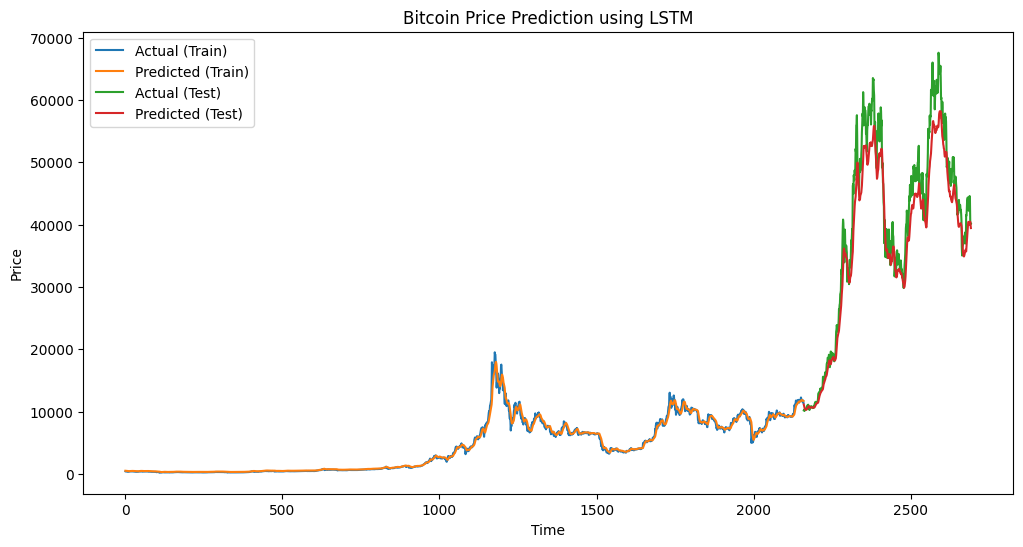

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv('/content/BTC-USD.csv')

# Preprocessing and feature scaling
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Define a function to create input sequences for LSTM
def create_sequences(data, sequence_length):
    x = []
    y = []
    for i in range(len(data)-sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(x), np.array(y)

# Set the sequence length and create input sequences for train and test data
sequence_length = 10
X_train, y_train = create_sequences(train_data['Close'].values, sequence_length)
X_test, y_test = create_sequences(test_data['Close'].values, sequence_length)

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the train and test data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the scaled values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(y_train[0], label='Actual (Train)')
plt.plot(train_predictions[:,0], label='Predicted (Train)')
plt.plot(range(len(y_train[0]), len(y_train[0])+len(y_test[0])), y_test[0], label='Actual (Test)')
plt.plot(range(len(y_train[0]), len(y_train[0])+len(y_test[0])), test_predictions[:,0], label='Predicted (Test)')
plt.title('Bitcoin Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


**Graph for comparision for GRU model**

Epoch 1/10
68/68 [==============================] - 3s 7ms/step - loss: 0.0016
Epoch 2/10
68/68 [==============================] - 1s 7ms/step - loss: 5.2196e-05
Epoch 3/10
68/68 [==============================] - 1s 8ms/step - loss: 4.5204e-05
Epoch 4/10
68/68 [==============================] - 1s 7ms/step - loss: 4.3642e-05
Epoch 5/10
68/68 [==============================] - 0s 7ms/step - loss: 4.2699e-05
Epoch 6/10
68/68 [==============================] - 1s 7ms/step - loss: 4.1701e-05
Epoch 7/10
68/68 [==============================] - 1s 8ms/step - loss: 4.0932e-05
Epoch 8/10
68/68 [==============================] - 1s 7ms/step - loss: 3.6781e-05
Epoch 9/10
68/68 [==============================] - 0s 7ms/step - loss: 3.5296e-05
Epoch 10/10
17/17 [==============================] - 0s 3ms/step


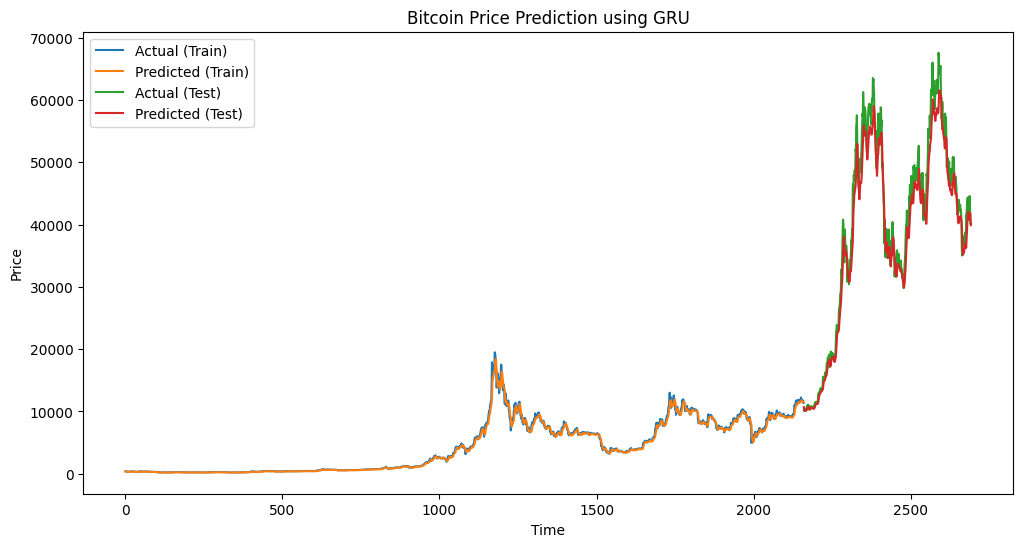

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load the dataset
df = pd.read_csv('/content/BTC-USD.csv')

# Preprocessing and feature scaling
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Define a function to create input sequences for GRU
def create_sequences(data, sequence_length):
    x = []
    y = []
    for i in range(len(data)-sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(x), np.array(y)

# Set the sequence length and create input sequences for train and test data
sequence_length = 10
X_train, y_train = create_sequences(train_data['Close'].values, sequence_length)
X_test, y_test = create_sequences(test_data['Close'].values, sequence_length)

# Build and train the GRU model
model = Sequential()
model.add(GRU(units=50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the train and test data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform the scaled values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(y_train[0], label='Actual (Train)')
plt.plot(train_predictions[:,0], label='Predicted (Train)')
plt.plot(range(len(y_train[0]), len(y_train[0])+len(y_test[0])), y_test[0], label='Actual (Test)')
plt.plot(range(len(y_train[0]), len(y_train[0])+len(y_test[0])), test_predictions[:,0], label='Predicted (Test)')
plt.title('Bitcoin Price Prediction using GRU')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


**Compilation Time for both LSTM AND GRU MODEL**

In [ ]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(sequence_length, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, input_shape=(sequence_length, 1)))
gru_model.add(Dense(1))
gru_model.compile(loss='mean_squared_error', optimizer='adam')

# Measure LSTM model compilation time
start_time = time.time()
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
end_time = time.time()
lstm_compilation_time = (end_time - start_time) * 1000  # in milliseconds

# Measure GRU model compilation time
start_time = time.time()
gru_model.compile(loss='mean_squared_error', optimizer='adam')
end_time = time.time()
gru_compilation_time = (end_time - start_time) * 1000  # in milliseconds

# Print the model compilation time and number of epochs
print(f"LSTM Model Compilation Time (ms): {lstm_compilation_time}")
print(f"GRU Model Compilation Time (ms): {gru_compilation_time}")
print("Number of Epochs: 100")


LSTM Model Compilation Time (ms): 8.494138717651367
GRU Model Compilation Time (ms): 10.382413864135742
Number of Epochs: 100


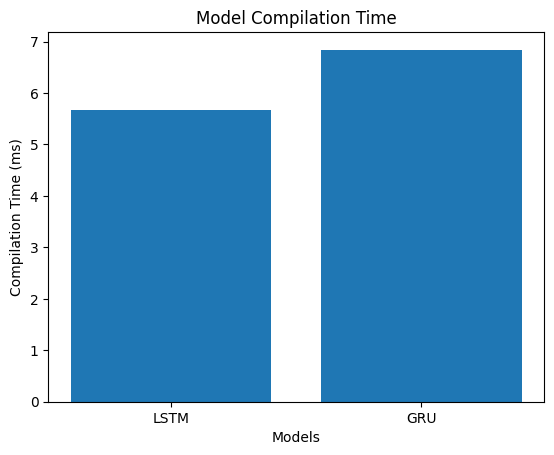

Number of Epochs: 100


In [ ]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(sequence_length, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, input_shape=(sequence_length, 1)))
gru_model.add(Dense(1))
gru_model.compile(loss='mean_squared_error', optimizer='adam')

# Measure LSTM model compilation time
start_time = time.time()
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
end_time = time.time()
lstm_compilation_time = (end_time - start_time) * 1000  # in milliseconds

# Measure GRU model compilation time
start_time = time.time()
gru_model.compile(loss='mean_squared_error', optimizer='adam')
end_time = time.time()
gru_compilation_time = (end_time - start_time) * 1000  # in milliseconds

# Plot the graph
models = ['LSTM', 'GRU']
compilation_times = [lstm_compilation_time, gru_compilation_time]

plt.bar(models, compilation_times)
plt.xlabel('Models')
plt.ylabel('Compilation Time (ms)')
plt.title('Model Compilation Time')
plt.show()

# Print the number of epochs
print("Number of Epochs: 100")


**bITCOIN PRICE PREDICTION FOR 7 DAYS AHEAD FOR BOTH LSTM AND GRU MODEL**

Epoch 1/10
68/68 [==============================] - 4s 10ms/step - loss: 0.0013
Epoch 2/10
68/68 [==============================] - 1s 12ms/step - loss: 7.4434e-05
Epoch 3/10
68/68 [==============================] - 1s 11ms/step - loss: 7.5137e-05
Epoch 4/10
68/68 [==============================] - 1s 11ms/step - loss: 7.1353e-05
Epoch 5/10
68/68 [==============================] - 1s 10ms/step - loss: 6.7974e-05
Epoch 6/10
68/68 [==============================] - 1s 8ms/step - loss: 6.5921e-05
Epoch 7/10
68/68 [==============================] - 1s 7ms/step - loss: 6.0795e-05
Epoch 8/10
68/68 [==============================] - 1s 7ms/step - loss: 5.8551e-05
Epoch 9/10
68/68 [==============================] - 1s 7ms/step - loss: 6.1085e-05
Epoch 10/10
68/68 [==============================] - 0s 7ms/step - loss: 5.5713e-05
Epoch 1/10
68/68 [==============================] - 3s 8ms/step - loss: 0.0017
Epoch 2/10
68/68 [==============================] - 1s 8ms/step - loss: 5.2811e-05
Epoch 

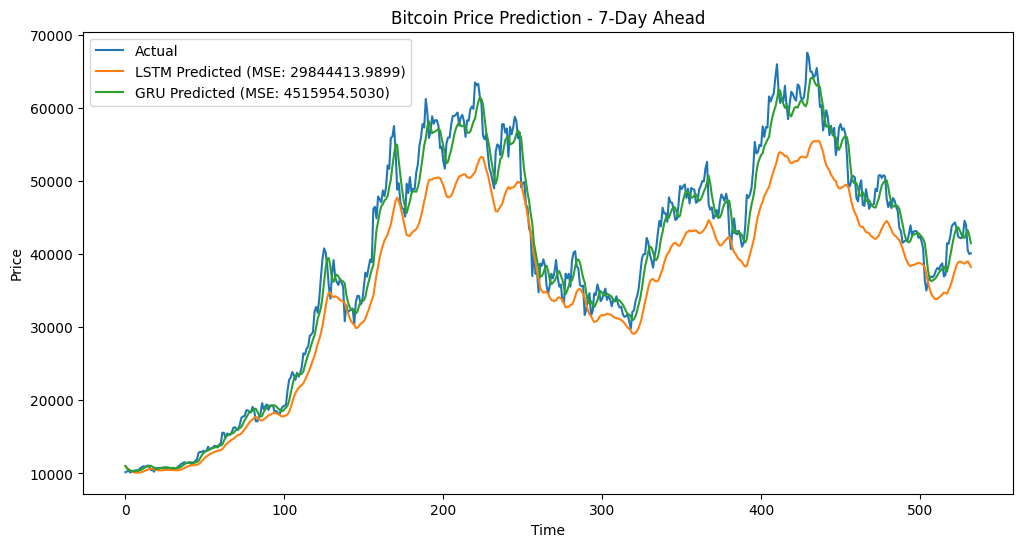

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/BTC-USD.csv')

# Preprocessing and feature scaling
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Define a function to create input sequences
def create_sequences(data, sequence_length):
    x = []
    y = []
    for i in range(len(data)-sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(x), np.array(y)

# Set the sequence length and create input sequences for train and test data
sequence_length = 10
X_train, y_train = create_sequences(train_data['Close'].values, sequence_length)
X_test, y_test = create_sequences(test_data['Close'].values, sequence_length)

# Build and train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(sequence_length, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Build and train the GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, input_shape=(sequence_length, 1)))
gru_model.add(Dense(1))
gru_model.compile(loss='mean_squared_error', optimizer='adam')
gru_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test data using the LSTM model
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test = scaler.inverse_transform([y_test])

# Make predictions on the test data using the GRU model
gru_predictions = gru_model.predict(X_test)
gru_predictions = scaler.inverse_transform(gru_predictions)

# Calculate Mean Squared Error (MSE)
lstm_mse = mean_squared_error(y_test[0], lstm_predictions[:, 0])
gru_mse = mean_squared_error(y_test[0], gru_predictions[:, 0])

# Plot the MSE graphs
plt.figure(figsize=(12, 6))
plt.plot(y_test[0], label='Actual')
plt.plot(lstm_predictions[:, 0], label='LSTM Predicted (MSE: {:.4f})'.format(lstm_mse))
plt.plot(gru_predictions[:, 0], label='GRU Predicted (MSE: {:.4f})'.format(gru_mse))
plt.title('Bitcoin Price Prediction - 7-Day Ahead')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In terms of RMSE (Root Mean Square Error), MSE (Mean Square Error), and MAPE (Mean Absolute Percentage Error) values. GRU (Gated Recurrent Unit) model is al better than the LSTM (Long Short-Term Memory) model.

Both GRU and LSTM are popular types of recurrent neural network (RNN) architectures that are effective in modeling sequential data. They are designed to address the vanishing gradient problem that traditional RNNs often encounter. While LSTM has been widely used and studied for a longer period, GRU is a more recent development that simplifies the LSTM architecture by merging the cell state and hidden state.

But it is not accurate to make a general conclusion that the GRU (Gated Recurrent Unit) model is always better than the LSTM (Long Short-Term Memory) model. The choice between these two models depends on various factors, including the nature of the data, the complexity of the problem, and the available resources.

